# OneR

- Fonte [OneRClassifier - "Uma Regra" para Classificação](http://rasbt.github.io/mlxtend/user_guide/classifier/OneRClassifier/)
- Fonte [4.5.1 Aprenda Regras a partir de um único recurso (OneR)](https://christophm.github.io/interpretable-ml-book/rules.html)
- Funciona apenas para valores **categóricos numéricos**
    - Necessário discretizar os dados contínuos. 

## Carregando Biblioteca

In [1]:
import pandas as pd
import numpy as np
#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
#Pré-processamento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
#Dados de Treino
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Regras
from mlxtend.classifier import OneRClassifier
#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Carregando os dados

In [98]:
df = pd.read_csv("../datasets/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Pré-Processamento de Dados

In [99]:
def pronomes(x):
    if 'Mr' in x:
        return 'Mr'
    elif 'Don' in x:
        return 'Mr'
    elif 'Mrs' in x:
        return 'Mrs'
    elif 'Ms' in x:
        return 'Mrs'
    elif 'Mme' in x:
        return 'Mrs'
    elif 'Miss' in x:
        return 'Miss'
    elif 'Mlle' in x:
        return 'Miss'
    elif 'Dr' in x:
        return 'Dr'
    elif 'Rev' in x:
        return 'Rev'
    elif 'Master' in x:
        return 'Master'
    elif 'Major' in x:
        return 'Major'
    elif 'Capt' in x:
        return 'Capt'
    elif 'Jonkheer' in x:
        return 'Mr'
    elif 'Col' in x:
        return 'Col'
    elif 'Countess' in x:
        return 'Mrs'
    else:
        return 'None'
# Extração de Pronomes
df['Name'] = df['Name'].apply(pronomes)

# Categóricas para Numéricas
le_name = LabelEncoder()
df['Name']  = le_name.fit_transform(df['Name'])

# Substituir valores ausentes/nulos
df['Age'].fillna(df['Age'].mean(), inplace = True)
df.loc[df['Embarked'].isna(), ['Embarked']] = df['Embarked'].value_counts().index[0]

# Categórico Para numérico
le_sex = LabelEncoder()
df['Sex']  = le_sex.fit_transform(df['Sex'])
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

# Remoção de colunas
df = df.drop(columns=['PassengerId', 'Ticket', 'Cabin'])

# Discretização de Dados
df['Age'], bins_age = pd.qcut(df['Age'], q=4, retbins=True,  labels=False)
df['Fare'], bins_fare = pd.qcut(df['Fare'], q=4, retbins=True,  labels=False)

# Categórico Para numérico
le_age = LabelEncoder()
df['Age']  = le_age.fit_transform(df['Age'])

le_fare = LabelEncoder()
df['Fare']  = le_fare.fit_transform(df['Fare'])

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,6,1,0,1,0,0,2
1,1,1,6,0,3,1,0,3,0
2,1,3,5,0,1,0,0,1,2
3,1,1,6,0,2,1,0,3,2
4,0,3,6,1,2,0,0,1,2


## Dados de Treino e Teste

In [100]:
x = pd.DataFrame.to_numpy(df[['Pclass', 'SibSp', 'Parch']])
y = pd.DataFrame.to_numpy(df['Survived'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# OneRClassifier()

- O metodo **fit()** é usado para treinar o modelo
- O método **predict()** é usado para prever um dado

In [101]:
classificador = OneRClassifier()
classificador = classificador.fit(x_train, y_train)

## Prever um valor

In [104]:
data = {
    'Pclass': [1],
    'Name': ['Miss'],
    'Sex': ['female'],
    'Age': [5],
    'SibSp': [1],
    'Parch': [1],
    'Fare': [50],
    'Embarked': ['C']
}

#Transformando do Dicionário em DataFrame
data = pd.DataFrame(data)

#Tratando os Dados
# Categóricas para Numéricas

data['Name']  = le_name.transform(data['Name'])
data['Sex']  = le_sex.transform(data['Sex'])
data['Embarked'] = le_embarked.transform(data['Embarked'])

data['Age'] = pd.cut(data['Age'], bins=bins_age, labels=False, include_lowest=True)
data['Fare'] = pd.cut(data['Fare'], bins=bins_fare, labels=False, include_lowest=True)
data['Age']  = le_age.transform(data['Age'])
data['Fare']  = le_fare.transform(data['Fare'])

#Converter para Numpy
data = pd.DataFrame.to_numpy(data)


#Classificando
previsao = classificador.predict(data)
print("\nPrevendo o dataframe criado: ", previsao)


Prevendo o dataframe criado:  [1]


## Prever os dados de Teste

In [105]:
previsao = classificador.predict(x_test)

acuracia = 100 * np.sum(previsao == y_test)/ len(y_test)

print("Acurácia {}%".format(acuracia))

Acurácia 67.59776536312849%


# Matriz de Confusão

- A biblioteca **sklearn.metrics** tem a função **confusion_matrix** que irá nos retornar a matriz de confusão dos dados previstos. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista de rótulos para indexar a matriz. Isso pode ser usado para reordenar ou selecionar um subconjunto de rótulos. Se Nenhum for fornecido, aqueles que aparecem pelo menos uma vez em y_true ou y_pred são usados na ordem de classificação 
- **sample_weight** - Pesos de amostra. 
- **normalize**: {‘true’, ‘pred’, ‘all’}, default=None - Normaliza a matriz de confusão sobre as condições verdadeiras (linhas), preditas (colunas) ou toda a população. Se nenhum, a matriz de confusão não será normalizada. 

In [106]:
confusion_matrix(y_test, previsao)

array([[94, 16],
       [42, 27]], dtype=int64)

## Personalizando a matriz de confusão

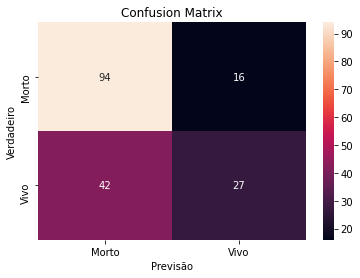

In [107]:
cm = confusion_matrix(y_test, previsao)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Previsão');
ax.set_ylabel('Verdadeiro'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Morto', 'Vivo']);
ax.yaxis.set_ticklabels(['Morto', 'Vivo']);

## Métricas

- A biblioteca **sklearn.metrics** tem a função **classification_report** que cria um relatório de texto mostrando as principais métricas de classificação. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista opcional de índices de rótulo a serem incluídos no relatório. 
- **target_names** - Nomes de exibição opcionais que correspondem aos rótulos (mesma ordem) 
- **sample_weight** - Peso das Amostras
- **digits** - Número de dígitos para formatar valores de ponto flutuante de saída. Quando output_dict for True, isso será ignorado e os valores retornados não serão arredondados.
- **output_dict** - Se verdadeiro, retorna a saída como dict
- **zero_division**: 'warn', 0 or 1, default='warn' - Define o valor a ser retornado quando houver uma divisão zero. Se definido como “aviso”, funciona como 0, mas os avisos também são gerados. 

In [108]:
print(classification_report(y_test, previsao, target_names = ['Morto', 'Vivo']))

              precision    recall  f1-score   support

       Morto       0.69      0.85      0.76       110
        Vivo       0.63      0.39      0.48        69

    accuracy                           0.68       179
   macro avg       0.66      0.62      0.62       179
weighted avg       0.67      0.68      0.66       179



## Acurácia

- A função **accuracy_score** pode ser usada para verificar a acurácia dos dados
- O método **Score** do classificador retorna a acurácia

In [109]:
accuracy_score(y_test, previsao)

0.6759776536312849

In [117]:
classificador.score(x_test, y_test)

0.6759776536312849

# Regras Geradas

- Há também uma prediction_dict_ disponível após o ajuste do modelo. Ele lista o erro total para o recurso selecionado (ou seja, o recurso listado em feature_idx_). Também fornece as regras de classificação:
- Terá uma regra por classe **{'X': y}**, onde X indica o valor da primeira classe, e y a previsão para aquele valor. .

In [114]:
classificador.feature_idx_

0

In [115]:
classificador.prediction_dict_

{'total error': 228, 'rules (value: class)': {1: 1, 2: 0, 3: 0}}